In [1]:
# # This code allows to output more than one variable value without using a print statement.
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# # Default
# # InteractiveShell.ast_node_interactivity = "last_expr"

In [2]:
# Version Check
import sys
import tensorflow as tf
import tensorflow_datasets as tfds
import PIL
import pandas as pd
import numpy as np
import scipy
print("python", sys.version)
print("tensorflow", tf.__version__)
print("tensorflow-datasets", tfds.__version__)
print("Pillow", PIL.__version__)
print("pandas", pd.__version__)
print("numpy", np.__version__)
print("scipy", scipy.__version__)
print()
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("Built with GPU support:", tf.test.is_built_with_gpu_support())

python 3.8.0 (default, Nov  6 2019, 16:00:02) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.6.2
tensorflow-datasets 4.4.0
Pillow 8.3.2
pandas 1.3.3
numpy 1.19.5
scipy 1.7.1

Num GPUs Available: 1
Built with CUDA: True
Built with GPU support: True


## load dataset

In [3]:
# load dataset
mnist = tf.keras.datasets.mnist

# train / test split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


## dataset visualization

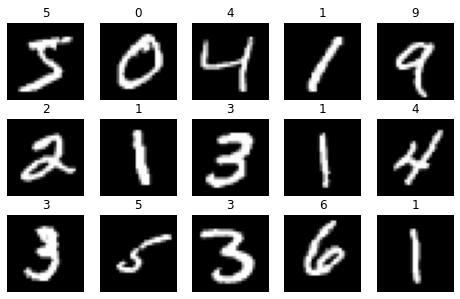

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt. subplots(nrows=3, ncols=5, figsize=(8, 5))

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

# plt.tight_layout()
plt.show()

## normalization

In [5]:
# before normailzation
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [6]:
# min, max before normailzation
x_train.min(), x_train.max()

(0, 255)

In [7]:
# normalization (x_train)
x_train = x_train / x_train.max()

In [8]:
# after normalization
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [9]:
# min, max after normalization
x_train.min(), x_train.max()

(0.0, 1.0)

In [10]:
# normalization (x_test)
x_test = x_test / x_test.max()

## flatten (just to understand)

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train.reshape(60000, -1).shape  # 784 = 28 * 28

(60000, 784)

In [13]:
# or you can use Flatten layer
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

## modeling

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


## compile

In [15]:
y_train[0]

5

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

## fit

In [17]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test), 
                    epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2292 - acc: 0.9310 - val_loss: 0.1115 - val_acc: 0.9645
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0903 - acc: 0.9720 - val_loss: 0.0862 - val_acc: 0.9730
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0634 - acc: 0.9791 - val_loss: 0.0968 - val_acc: 0.9702
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0483 - acc: 0.9847 - val_loss: 0.0725 - val_acc: 0.9783
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0385 - acc: 0.9878 - val_loss: 0.0812 - val_acc: 0.9759
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0332 - acc: 0.9894 - val_loss: 0.0900 - val_acc: 0.9762
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282 - acc: 0.9907 - val_loss: 0.0921 - val_acc: 0.9779
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

## fit history visualization

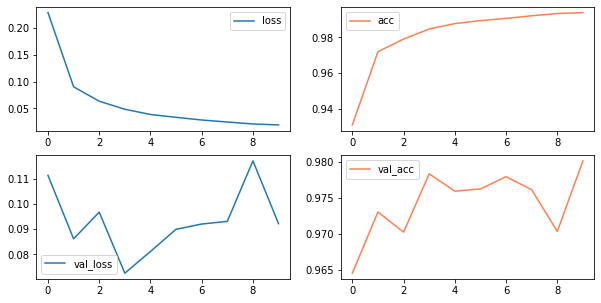

In [18]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
ax1.plot(history.history['loss'], label='loss')
ax2.plot(history.history['acc'], label='acc', color='coral')
ax3.plot(history.history['val_loss'], label='val_loss')
ax4.plot(history.history['val_acc'], label='val_acc', color='coral')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

## evaluate

In [19]:
model.evaluate(x_test, y_test)  # val_loss, val_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - acc: 0.9801


[0.09221204370260239, 0.9800999760627747]

## predict

In [20]:
model.predict(x_test)

array([[6.5973618e-09, 4.3998312e-09, 9.7436503e-09, ..., 9.9999762e-01,
        1.0918683e-11, 2.3854843e-06],
       [1.0269994e-16, 3.2396536e-19, 1.0000000e+00, ..., 2.9642133e-17,
        3.9289959e-14, 8.0321709e-21],
       [2.4989750e-11, 9.9999273e-01, 1.5745525e-06, ..., 4.8374632e-06,
        8.8097373e-08, 6.1597412e-09],
       ...,
       [1.6106983e-18, 6.0495080e-14, 1.4036200e-14, ..., 4.0969376e-12,
        1.0455807e-12, 8.2278291e-09],
       [5.9613189e-11, 1.2326460e-16, 3.4444476e-14, ..., 7.0753395e-15,
        5.8291627e-10, 6.9320157e-13],
       [2.6759536e-16, 1.7348658e-15, 1.1821992e-17, ..., 7.1437159e-21,
        1.2227348e-11, 4.0924410e-15]], dtype=float32)

In [21]:
pred = model.predict(x_test)
np.argmax(pred[0])

7

In [22]:
np.argmax(pred[:10], axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

## prediction visualization

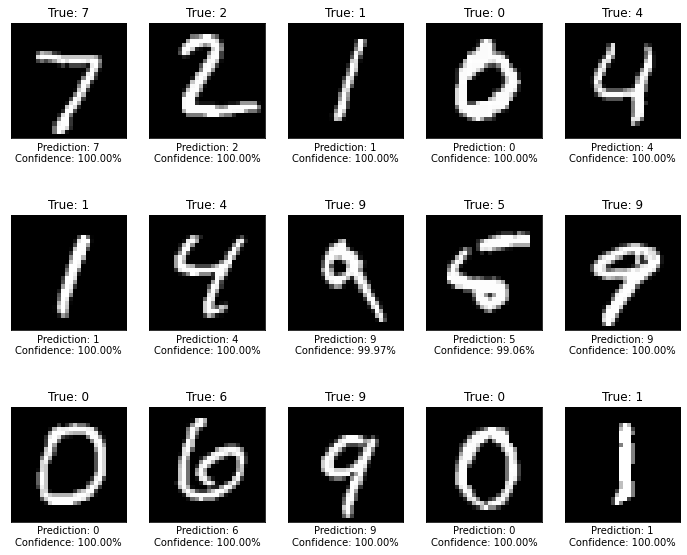

In [23]:
import matplotlib.pyplot as plt

def get_one_result(idx):  # input = index
    img = x_test[idx]
    y_true = y_test[idx]
    y_pred = np.argmax(pred[idx])
    confidence = 100 * np.max(pred[idx])
    
    return img, y_true, y_pred, confidence

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 10))

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: {confidence:.2f}%')
    
# plt.tight_layout()
plt.show()